In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('masterfile.csv',index_col='Date',parse_dates=True)
df=df.dropna()
df

,deaths,cases,total_doses,cumulative_total_doses
Date,,,,
2020-07-27,149,9087,5,6
2020-07-28,129,8799,6,12
2020-07-29,157,7812,9,21
2020-07-30,147,7239,13,34
2020-07-31,148,7215,6,40
...,...,...,...,...
2022-10-13,3,2241,93360,81214586
2022-10-14,0,1670,119568,81334154
2022-10-15,1,1088,49843,81383997


In [3]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
print('Shape of data',df.shape)

Shape of data (813, 4)


In [5]:
df = df.drop(['cumulative_total_doses'], axis=1)

<AxesSubplot:xlabel='Date'>

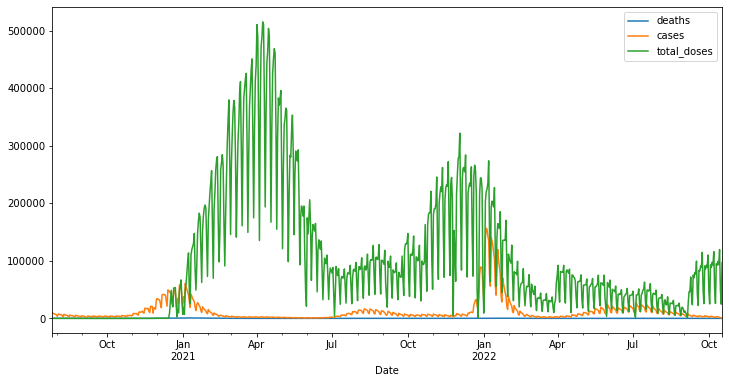

In [6]:
df.plot(figsize=(12,6))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\fermi\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


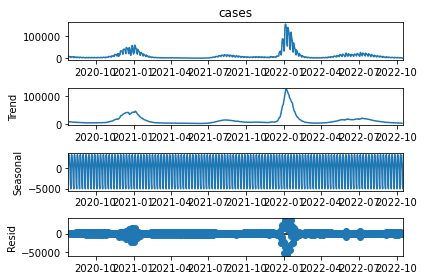

In [8]:
results = seasonal_decompose(df['cases'])
results.plot();

In [9]:
diffs = df['cases'].diff().diff()

In [10]:
diffs.dropna(inplace=True)

In [11]:
diffs

Date
2020-07-29    -699.0
2020-07-30     414.0
2020-07-31     549.0
2020-08-01   -1804.0
2020-08-02      13.0
               ...  
2022-10-13     -77.0
2022-10-14    -181.0
2022-10-15     -11.0
2022-10-16     309.0
2022-10-17     206.0
Name: cases, Length: 811, dtype: float64

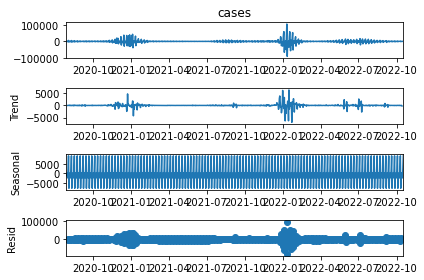

In [12]:
results = seasonal_decompose(diffs)
results.plot();

In [13]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ", dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [14]:
ad_test(diffs)

1. ADF :  -8.825153045460013
2. P-Value :  1.8320471000826822e-14
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression: 791
5. Critical Values :
	 1% :  -3.4386441190814265
	 5% :  -2.8652008302305316
	 10% :  -2.568719369407094


In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [16]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(diffs, trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17278.621, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17210.586, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17276.621, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17097.094, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17058.058, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17046.900, Time=0.08 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=16893.131, Time=0.12 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=16552.935, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=16338.604, Time=0.58 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=16361.601, Time=0.67 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  811
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -8160.301
Date:                Thu, 10 Nov 2022   AIC                          16336.603
Time:                        18:55:38   BIC                          16374.189
Sample:                    07-29-2020   HQIC                         16351.032
                         - 10-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0540      0.010      5.222      0.000       0.034       0.074
ar.L2         -0.5296      0.010    -51.073      0.000      -0.550      -0.509
ar.L3         -0.3375      0.011    -29.847      0.000      -0.360      -0.315
ar.L4         -0.2995      0.015    -20.574      0.000      -0.328      -0.271
ar.L5         -0.5521      0.012    -44.308      0.000      -0.577      -0.528
ma.L1         -1.2133      0.014    -86.695      0.000      -1.241      -1.186
ma.L2          0.4556      0.014     32.716      0.000       0.428       0.483
sigma2      2.513e+07   8.71e-11   2.88e+17      0.000    2.51e+07    2.51e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.89   Jarque-Bera (JB):             33855.89
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.8e+32. Standard errors may be unstable.
"""

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(813, 3)
(783, 3) (30, 3)


In [23]:
model=ARIMA(diffs, order=(5,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  cases   No. Observations:                  811
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -8160.301
Date:                Thu, 10 Nov 2022   AIC                          16338.603
Time:                        18:59:03   BIC                          16380.887
Sample:                    07-29-2020   HQIC                         16354.836
                         - 10-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2725     19.307      0.014      0.989     -37.569      38.114
ar.L1          0.0540      0.010      5.215      0.000       0.034       0.074
ar.L2         -0.5296      0.011    -49.314      0.000      -0.551      -0.509
ar.L3         -0.3374      0.011    -29.810      0.000      -0.360      -0.315
ar.L4         -0.2995      0.015    -20.123      0.000      -0.329      -0.270
ar.L5         -0.5521      0.013    -43.564      0.000      -0.577      -0.527
ma.L1         -1.2134      0.014    -86.407      0.000      -1.241      -1.186
ma.L2          0.4556      0.014     32.720      0.000       0.428       0.483
sigma2      2.513e+07    3.6e-05   6.97e+11      0.000    2.51e+07    2.51e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.88   Jarque-Bera (JB):             33861.07
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+27. Standard errors may be unstable.
"""

In [24]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)

2022-09-20   -2225.542799
2022-09-21    -176.124565
2022-09-22     226.829485
2022-09-23    -203.917284
2022-09-24    -901.476678
2022-09-25    1222.616075
2022-09-26    1036.061917
2022-09-27   -2118.401778
2022-09-28     154.937997
2022-09-29     101.111822
2022-09-30     296.461897
2022-10-01    -646.796747
2022-10-02    1300.258228
2022-10-03    1179.309204
2022-10-04   -1515.390967
2022-10-05     122.417410
2022-10-06     238.092760
2022-10-07      22.516183
2022-10-08    -804.065715
2022-10-09     924.513523
2022-10-10     830.377652
2022-10-11   -1343.056074
2022-10-12    -238.440423
2022-10-13     187.887808
2022-10-14     222.182474
2022-10-15     -16.714001
2022-10-16     889.649771
2022-10-17     882.430522
2022-10-18     504.879794
2022-10-19    -390.314637
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Date'>

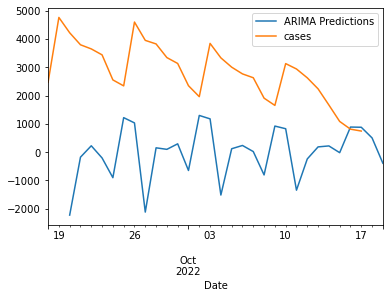

In [26]:
pred.plot(legend=True)
test['cases'].plot(legend=True)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['cases'].mean()
rmse=sqrt(mean_squared_error(pred,test['cases']))
print(rmse)

3144.288399976591
